In [1]:
from kiteconnect import KiteTicker, KiteConnect
import datetime as dt
import sys
import pandas as pd
import os
import time
import numpy as np
import pandas_ta as ta
import requests
from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter

In [2]:
cwd = os.chdir(r"C:\Users\Admin\stocksdata")
#generate trading session
access_token = open("access_token.txt",'r').read()
key_secret = open("api_key.txt",'r').read().split()
kite = KiteConnect(api_key=key_secret[0])
kite.set_access_token(access_token)

In [14]:
instrument_dump = kite.instruments("NSE") 
instrument_df = pd.DataFrame(instrument_dump)

def instrumentLookup(instrument_df,symbol):
    """Looks up instrument token for a given script from instrument dump"""
    try:
        return instrument_df[instrument_df.tradingsymbol==symbol].instrument_token.values[0]
    except:
        return -1
    
def fetchOHLC(ticker,interval,duration):
    """extracts historical data and outputs in the form of dataframe"""
    instrument = instrumentLookup(instrument_df,ticker)
    data = pd.DataFrame(kite.historical_data(instrument,dt.date.today()-dt.timedelta(duration), dt.date.today(),interval))
    data.set_index("date",inplace=True)
    return data

In [15]:
instrument_dump_nfo = kite.instruments("NFO") 
instrument_df_nfo = pd.DataFrame(instrument_dump_nfo)
fno=instrument_df_nfo["name"].unique()

In [37]:
def OHLC_data(ticker):
 
    data = fetchOHLC(ticker,"hour",200)
    ohlc_dict = {
        'open':'first',
        'high':'max',
        'low':'min',
        'close':'last',
        'volume':'sum'
        }

    #data1 = data.resample('W').agg(ohlc_dict)
   # print(data1)
    #pd.concat([data,data1], axis=0, join='inner')
    #data1 = data1.copy()
    data["Entity Name"] = ticker
    
    return(data)

In [38]:
data =OHLC_data("NIFTY BANK")
data

,open,high,low,close,volume,Entity Name
date,,,,,,
2023-04-17 09:15:00+05:30,42603.55,42603.55,41801.15,41922.00,0,NIFTY BANK
2023-04-17 10:15:00+05:30,41921.80,42190.50,41914.00,42037.65,0,NIFTY BANK
2023-04-17 11:15:00+05:30,42036.60,42147.65,42018.05,42097.05,0,NIFTY BANK
2023-04-17 12:15:00+05:30,42093.80,42241.10,42068.15,42157.65,0,NIFTY BANK
2023-04-17 13:15:00+05:30,42160.20,42241.05,42077.00,42229.15,0,NIFTY BANK
...,...,...,...,...,...,...
2023-11-02 11:15:00+05:30,43084.45,43088.65,42796.45,42869.10,0,NIFTY BANK
2023-11-02 12:15:00+05:30,42866.75,42942.65,42852.45,42942.45,0,NIFTY BANK
2023-11-02 13:15:00+05:30,42942.65,42963.80,42852.95,42947.10,0,NIFTY BANK


In [39]:
data = data[["close"]]

In [40]:
data

,close
date,
2023-04-17 09:15:00+05:30,41922.00
2023-04-17 10:15:00+05:30,42037.65
2023-04-17 11:15:00+05:30,42097.05
2023-04-17 12:15:00+05:30,42157.65
2023-04-17 13:15:00+05:30,42229.15
...,...
2023-11-02 11:15:00+05:30,42869.10
2023-11-02 12:15:00+05:30,42942.45
2023-11-02 13:15:00+05:30,42947.10


In [41]:
data["returns"] = data["close"].pct_change()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17924\443619648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["returns"] = data["close"].pct_change()


In [42]:
data

,close,returns
date,,
2023-04-17 09:15:00+05:30,41922.00,NaN
2023-04-17 10:15:00+05:30,42037.65,0.002759
2023-04-17 11:15:00+05:30,42097.05,0.001413
2023-04-17 12:15:00+05:30,42157.65,0.001440
2023-04-17 13:15:00+05:30,42229.15,0.001696
...,...,...
2023-11-02 11:15:00+05:30,42869.10,-0.004976
2023-11-02 12:15:00+05:30,42942.45,0.001711
2023-11-02 13:15:00+05:30,42947.10,0.000108


In [43]:
data["log_returns"] = np.log(1+data["returns"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_17924\1033919049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["log_returns"] = np.log(1+data["returns"])


In [44]:
data

,close,returns,log_returns
date,,,
2023-04-17 09:15:00+05:30,41922.00,NaN,NaN
2023-04-17 10:15:00+05:30,42037.65,0.002759,0.002755
2023-04-17 11:15:00+05:30,42097.05,0.001413,0.001412
2023-04-17 12:15:00+05:30,42157.65,0.001440,0.001438
2023-04-17 13:15:00+05:30,42229.15,0.001696,0.001695
...,...,...,...
2023-11-02 11:15:00+05:30,42869.10,-0.004976,-0.004989
2023-11-02 12:15:00+05:30,42942.45,0.001711,0.001710
2023-11-02 13:15:00+05:30,42947.10,0.000108,0.000108


In [45]:
import matplotlib.pyplot as plt

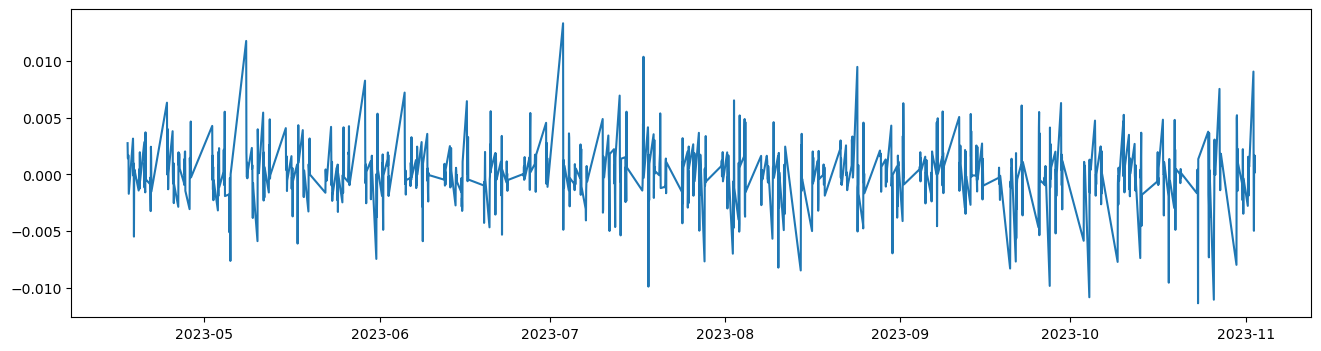

In [46]:
plt.figure(1, figsize = (16, 4))
plt.plot(data["log_returns"])
plt.show()

In [47]:
data.dropna(inplace = True)
X = data[["close","log_returns"]].values

C:\Users\Admin\AppData\Local\Temp\ipykernel_17924\2930610571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [48]:
X

array([[4.20376500e+04, 2.75489650e-03],
       [4.20970500e+04, 1.41202167e-03],
       [4.21576500e+04, 1.43849567e-03],
       ...,
       [4.29471000e+04, 1.08278597e-04],
       [4.29638000e+04, 3.88774887e-04],
       [4.30335000e+04, 1.62098148e-03]])

In [49]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [50]:
normalizer = MinMaxScaler(feature_range=(0,1))
X_scaled = normalizer.fit_transform(X)

In [51]:
X_scaled[:5]

array([[0.01102396, 0.57192776],
       [0.0250159 , 0.51764084],
       [0.03929051, 0.51871108],
       [0.05613266, 0.52906344],
       [0.07031305, 0.51814692]])

In [55]:
y = [x[0] for x in X_scaled]

In [56]:
y[:5]

[0.01102395590417693,
 0.025015899936400743,
 0.03929050950462809,
 0.056132664358232276,
 0.07031305208112393]

In [57]:
split = int(len(X_scaled)*0.8)
print(split)

772


In [60]:
X_train = X_scaled[:split]
X_test = X_scaled[split:len(X_scaled)]

y_train = y[:split]
y_test = y[split:len(y)]

In [61]:
assert len(X_train) == len(y_train)

assert len(X_test) == len(y_test)

In [64]:
X_train.shape[1]

2

In [95]:
# Time step in the past 3 to predict the future
n = 3
Xtrain = []
ytrain = []
Xtest = []
ytest = []

for i in range(n, len(X_train)):
    Xtrain.append(X_train[i - n: i, : X_train.shape[1]])
    ytrain.append(y_train[i]) # predict next record
    
for i in range(n, len(X_test)):
    Xtest.append(X_test[i - n: i, : X_test.shape[1]])
    ytest.append(y_test[i])

In [96]:
Xtrain[0]

array([[0.01102396, 0.57192776],
       [0.0250159 , 0.51764084],
       [0.03929051, 0.51871108]])

In [97]:
y[0]

0.01102395590417693

In [98]:
np.array(ytrain[0])

array(0.05613266)

In [99]:
np.zeros(np.array(ytrain[0]).shape)

array(0.)

In [100]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [101]:
val

array([[0.05613266, 0.        ]])

In [102]:
normalizer.inverse_transform(val)

array([[ 4.22291500e+04, -1.13926633e-02]])

In [103]:
data.head()

,close,returns,log_returns
date,,,
2023-04-17 10:15:00+05:30,42037.65,0.002759,0.002755
2023-04-17 11:15:00+05:30,42097.05,0.001413,0.001412
2023-04-17 12:15:00+05:30,42157.65,0.001440,0.001438
2023-04-17 13:15:00+05:30,42229.15,0.001696,0.001695
2023-04-17 14:15:00+05:30,42289.35,0.001426,0.001425


In [104]:
len(Xtrain)

769

In [105]:
np.array(Xtrain)

array([[[0.01102396, 0.57192776],
        [0.0250159 , 0.51764084],
        [0.03929051, 0.51871108]],

       [[0.0250159 , 0.51764084],
        [0.03929051, 0.51871108],
        [0.05613266, 0.52906344]],

       [[0.03929051, 0.51871108],
        [0.05613266, 0.52906344],
        [0.07031305, 0.51814692]],

       ...,

       [[0.63054437, 0.33725462],
        [0.62160507, 0.42619787],
        [0.61699998, 0.44284622]],

       [[0.62160507, 0.42619787],
        [0.61699998, 0.44284622],
        [0.6269286 , 0.49873702]],

       [[0.61699998, 0.44284622],
        [0.6269286 , 0.49873702],
        [0.69107012, 0.70633609]]])

In [106]:
np.array(Xtrain).shape[0],np.array(Xtrain).shape[1],np.array(Xtrain).shape[2]

(769, 3, 2)

In [107]:
np.reshape(Xtrain, (np.array(Xtrain).shape[0], np.array(Xtrain).shape[1], np.array(Xtrain).shape[2]))

array([[[0.01102396, 0.57192776],
        [0.0250159 , 0.51764084],
        [0.03929051, 0.51871108]],

       [[0.0250159 , 0.51764084],
        [0.03929051, 0.51871108],
        [0.05613266, 0.52906344]],

       [[0.03929051, 0.51871108],
        [0.05613266, 0.52906344],
        [0.07031305, 0.51814692]],

       ...,

       [[0.63054437, 0.33725462],
        [0.62160507, 0.42619787],
        [0.61699998, 0.44284622]],

       [[0.62160507, 0.42619787],
        [0.61699998, 0.44284622],
        [0.6269286 , 0.49873702]],

       [[0.61699998, 0.44284622],
        [0.6269286 , 0.49873702],
        [0.69107012, 0.70633609]]])

In [108]:
# Number of observations
# Time step
# Features

Xtrain, ytrain = np.array(Xtrain), np.array(ytrain)
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = np.array(Xtest), np.array(ytest)
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [109]:
print(Xtrain.shape)
print(ytrain.shape)
print("----")
print(Xtest.shape)
print(ytest.shape)

(769, 3, 2)
(769,)
----
(190, 3, 2)
(190,)


In [110]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

In [117]:
# Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units = 4 ,return_sequences = True, input_shape = (Xtrain.shape[1],Xtrain.shape[2])))
model.add(LSTM(units = 4, return_sequences = True))
model.add(LSTM(units = 4))
#model.add(GRU(units = 100))
model.add(Dense(units = 1, activation = "linear"))


In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 4)              112       
                                                                 
 lstm_5 (LSTM)               (None, 3, 4)              144       
                                                                 
 lstm_6 (LSTM)               (None, 4)                 144       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 405
Trainable params: 405
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics=["accuracy"])
model.fit(Xtrain, ytrain, validation_data = (Xtest, ytest), epochs = 100, batch_size=16, verbose = 1)

Epoch 1/100
49/49 [==============================] - 8s 33ms/step - loss: 0.2825 - accuracy: 0.0013 - val_loss: 0.1146 - val_accuracy: 0.0000e+00
Epoch 2/100
49/49 [==============================] - 0s 5ms/step - loss: 0.1357 - accuracy: 0.0013 - val_loss: 0.0282 - val_accuracy: 0.0000e+00
Epoch 3/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0469 - accuracy: 0.0000e+00 - val_loss: 0.0367 - val_accuracy: 0.0000e+00
Epoch 4/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0390 - accuracy: 0.0013 - val_loss: 0.0318 - val_accuracy: 0.0000e+00
Epoch 5/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.0026 - val_loss: 0.0291 - val_accuracy: 0.0000e+00
Epoch 6/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.0026 - val_loss: 0.0210 - val_accuracy: 0.0000e+00
Epoch 7/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0137 - accuracy: 0.0026 - val_loss: 0.0106 - val_a

49/49 [==============================] - 0s 5ms/step - loss: 0.0010 - accuracy: 0.0026 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 58/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 0.0026 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 59/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 0.0026 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 60/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 0.0026 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 61/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 0.0026 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 62/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 0.0026 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 63/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 0.0026 - val_loss: 0.0015 - val_accuracy: 0.

In [120]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

6/6 [==============================] - 0s 2ms/step


In [127]:
trainPredict.shape

(769, 1)

In [126]:
np.zeros(trainPredict.shape)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [128]:
np.c_[trainPredict, np.zeros(trainPredict.shape)].shape

(769, 2)

In [129]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]

testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [130]:
trainPredict = normalizer.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = normalizer.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [131]:
print(trainPredict[:5])
print('----------')
print(testPredict[:5])

[42188.30649326183, 42242.56186806187, 42290.77483121529, 42305.0322841309, 42342.497327079625]
----------
[44558.63865827322, 44552.96981214881, 44434.935189771655, 44367.951306384806, 44509.73976802826]


In [132]:
# Calculating rmse

In [133]:
from sklearn.metrics import mean_squared_error

In [134]:
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared = False)
print("train score: %.2f RMSE" % (trainScore))

train score: 44275.53 RMSE


In [135]:
testScore = mean_squared_error([x[0][0] for x in Xtest], testPredict, squared = False)
print("train score: %.2f RMSE" % (testScore))

train score: 43868.43 RMSE
